## Homework
By starting from the notebook 04, build your own model by using nn.Sequential and perform some changes to the
training setting (like the optimizer, or its parameters). Then, train it on the spiral dataset and observe how the space
is separated by plotting it.

For any question, contact me by email.

**Solution.**

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import torch
from torch import nn, optim
from IPython import display
from utils.visual import set_default, plot_data, plot_model
set_default()

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device: {}'.format(device))

Device: cpu


In [18]:
torch.manual_seed(41)
N = 1000 # num samples per class
D = 2    # dimensions
C = 3    # num classes
H = 200  # num hidden units

In [10]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype = torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * np.pi / C) * c,
        # When t = 1
        (2 * np.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c+1)):
        X[ix] = t[index] * torch.FloatTensor((
            np.sin(inner_var[index]), np.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1
        
print("Shapes:")
print("X:", X.size())
print("y:", y.size())

Shapes:
X: torch.Size([3000, 2])
y: torch.Size([3000])


In [46]:
X

tensor([[ 0.0000e+00,  0.0000e+00],
        [-7.3171e-05,  9.9832e-04],
        [ 8.9462e-05,  2.0000e-03],
        ...,
        [ 9.2191e-01, -3.8221e-01],
        [ 9.2365e-01, -3.8061e-01],
        [ 8.8167e-01, -4.7187e-01]])

In [11]:
y

tensor([0, 0, 0,  ..., 2, 2, 2])

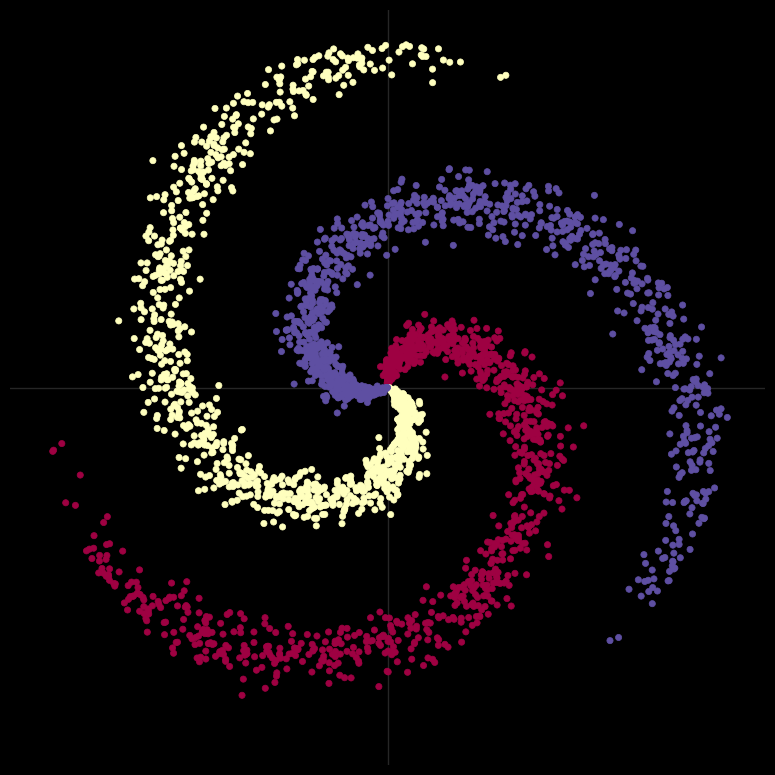

In [12]:
# visualise the data
plot_data(X, y)

In [69]:
# %%timeit

lr = 1e-3
lambdaL2 = 1e-5
epochs = 1000

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C),
    nn.LogSoftmax(dim = 1)) # mandatory with NLLLoss
model.to(device)
#print(list(model.parameters()))

#criterion = nn.CrossEntropyLoss()
#criterion = torch.nn.NLLLoss()
criterion = nn.MultiMarginLoss() # best one

#optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=lambdaL2)
#optimizer = optim.ASGD(model.parameters(), lr=lr, weight_decay=lambdaL2)
optimizer = optim.RMSprop(model.parameters(), lr=lr, weight_decay=lambdaL2) # slower but better than the others
# model.parameters() is an iterable that contains the parameters of the model

In [71]:
for e in range(1, epochs+1):
    y_pred = model(X) # compute predictions
    loss = criterion(y_pred, y) # compute loss
    print("[EPOCH]: {}, [LOSS]: {}".format(e, loss.item()))
    display.clear_output(wait=True)
    
    optimizer.zero_grad() # at every epoch I set the gradients to zero
    loss.backward() # the gradients will populate each trainable parameter in our model
    optimizer.step() # updates according to the optimizer the parameters

[EPOCH]: 1000, [LOSS]: 0.005435159895569086


Sequential(
  (0): Linear(in_features=2, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=3, bias=True)
  (5): LogSoftmax()
)


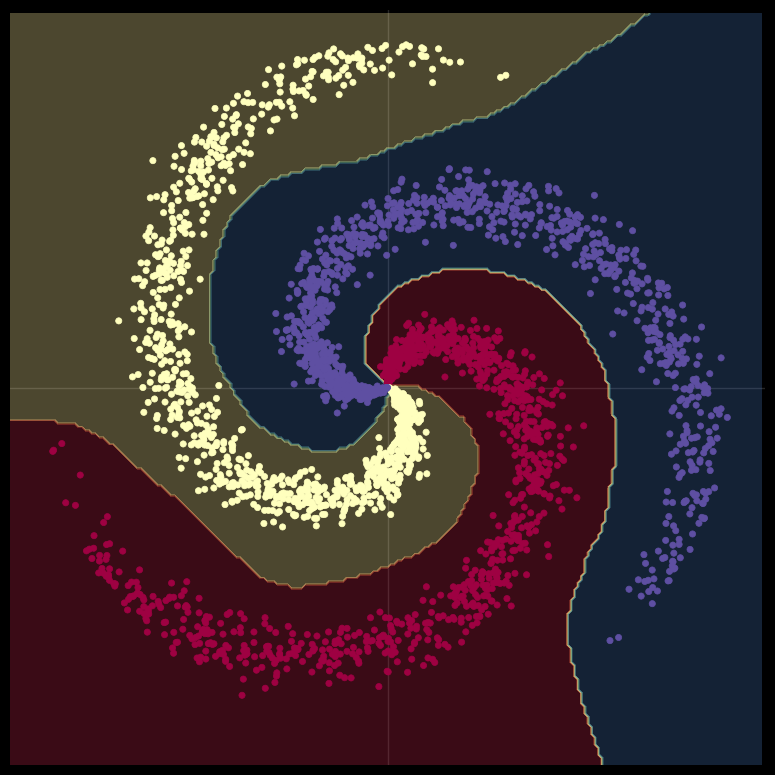

In [72]:
# Plot trained model
set_default()
print(model)
plot_model(X, y, model)